# Linear Regression with Python
Linear Regression is one of the most widely used supervised machine learning algorithm. This algorithm is used to find the linear relationship between two variables. In this project, I have used <b><i>Laptop Price</i></b> dataset. The aim of this project is to predict the <b><i>Price_euros</i></b> based on the applied explanatory variables.

## 1. Introduction to Linear Regression
Machine learning algorithms are mostly categorized into two groups, supervised and unsupervised learning. These can be differentiated with the help of dependent or target variable. In supervised learning, a machine predict the output based on the given well labelled trained data.<br><br>
The relationship between two variables can be found using linear regression. We apply linear equation to the observed data for this. Among the two varibles which is used in this algorithm, one is called an independent or explanatory variable whereas the other is said to be dependent or target variable. 

## 2. Terminologies

### Gradient descent
It is one of the most commonly-used optimization technique which is applied in machine learning models and neural network. 

### Cost function
The cost function falls under the gradient descent. Here, this function works as barometer which measures the accuracy with each iteration of paramter updates. The model tries to adjust its parameters until the cost function comes colser to zero.

### Root Mean Square Error
It tells how the regression model fits a dataset. RMSE is a metric which gives the average distance between actual values and predicted values in the dataset. A model is considered better for fitting in the dataset if the RMSE value is lower.

### Coefficient of Determination (R Squared)
It is also used to measure the accuracy of model. This is used to predict the future outcomes of model. Generally, it ranges from 0 to 1. Moreover, it gives information about the level of variation in the dataset.

## 3. The problem statement
In this project, I am going to predict the output based on the given input. I have used <b><i>Laptop Price</i></b> dataset in this project. Mainly, the aim of this project is to predict <b><i>Price_euros</i></b> based on the given input data such as <b><i>(Ram, ScreenResolution, Memory, Weight, Cpu etc)</i></b>. 

## 4. Dataset description
In this project, <b><i>Laptop Price</i></b> dataset has been used which was downloaded from kaggle.com. You can find the dataset at the following url :<br><br>https://www.kaggle.com/muhammetvarl/laptop-price<br><br>
This dataset contains details of laptops of certain companies. In this dataset, there are 13 columns in total. The <b><i>Company</i></b> variable contains name of laptop brands, whereas <b><i>Product</i></b> consists of laptop models. Similarly, <b><i>Inches</i></b> tells about the screen size of laptop, and <b><i>Cpu</i></b> gives the information about processor types and its speed. Likewise, storage details can be found on <b><i>Ram</i></b> and <b><i>Memory</i></b> columns. Finally, <b><i>Price_euros</i></b> gives information about the selling price of laptops.

## 5. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## 6. Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 7. Import dataset

In [3]:
data = pd.read_csv('laptop_price.csv', encoding = 'unicode_escape', engine ='python')

## 8. Data analysis

### Shape of dataset

In [4]:
data.shape

(1303, 13)

Here, we can see that there are 13 attributes and 1303 instances in the dataset. We have to see some more details about the dataset. Hence, we are going to see the first 5 instances of the dataset.

### Preview the dataset

In [5]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Summary of dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


From the above information, we can see that there are 13 columns in the dataset, each columns having values of different types. All together, there 3 types of data present in our dataset.<br><br>The columns are classified based on the types of data it holds.<br>Float - <b><i>Inches, Price_euros</i></b><br>Int - <b><i>laptop_ID</i></b><br>Object - <b><i>Company, Product, TypeName, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight</i></b>

### Copy data in another variable

In [7]:
dataSet = data

From here, we are going to perform all the operation on dataSet.

### Check for missing values in dataset

In [8]:
dataSet.isnull().any()

laptop_ID           False
Company             False
Product             False
TypeName            False
Inches              False
ScreenResolution    False
Cpu                 False
Ram                 False
Memory              False
Gpu                 False
OpSys               False
Weight              False
Price_euros         False
dtype: bool

We can see that each column in the dataset contains some values.In otherword, there are no any missing values in our dataset.

## 9. Data Visualization

### Company with highest sale

Text(0.5, 1.0, 'Total Sales made by Company')

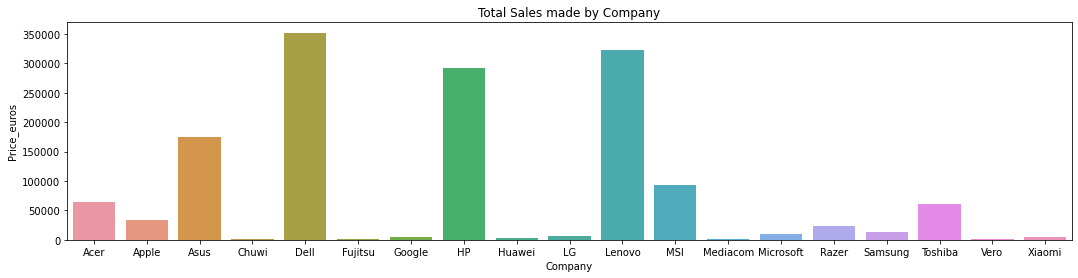

In [9]:
sales = dataSet.groupby('Company').sum()
plt.figure(figsize = (18, 4))
sns.barplot(data = sales, x = sales.index, y = 'Price_euros')
plt.title('Total Sales made by Company')

In the above figure, we find that the highest sales has been made by <b>Dell</b> company keeping it in the first place followed by <b>Lenove</b> and <b>HP</b> on second and third position, respectively. However, companies like <b>Chuwi</b>, <b>Fujitsu</b>, <b>Google</b>, <b>Huawei</b>, <b>LG Company</b>, <b>Mediacom</b>, <b>Vero</b> and <b>Xiaomi</b> have made very few sales.

### Company with largest amount of Laptops

Text(0, 0.5, 'Laptops Count')

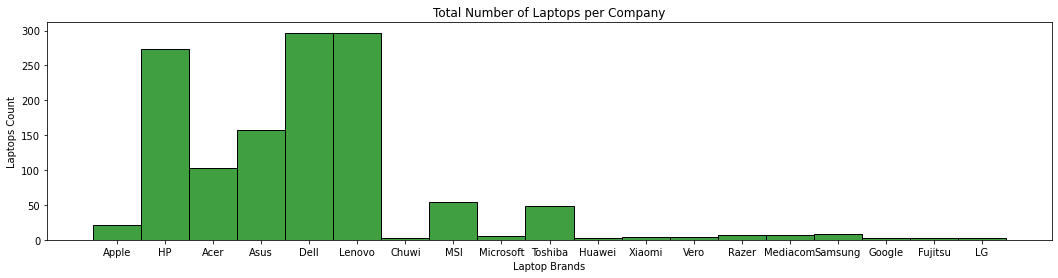

In [10]:
plt.figure(figsize = (18, 4))
sns.histplot(x ="Company", data=dataSet, color='green')
plt.title('Total Number of Laptops per Company')
plt.xlabel('Laptop Brands')
plt.ylabel('Laptops Count')

In the above histogram, more than 250 laptops belong to <b>HP, Dell and Lenovo</b>. As we can see equal amount of laptops are selled by <b>Dell</b> and <b>Lenove</b> brands. However, small amount of laptops are selled by <b>Chuwi</b>, <b>Microsoft</b>,  <b>Huawei</b>, <b>Xiaomi</b>, <b>Vero</b>, <b>Razer</b>, <b>Mediacom</b>, <b>Samsung</b>, <b>Google</b>, <b>Fujitsu</b> and <b>LG</b>;

### RAM and Price relationship

Text(0, 0.5, 'Price_euros')

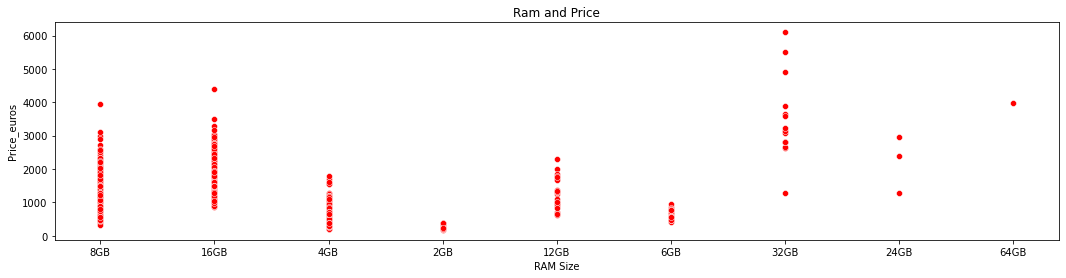

In [11]:
plt.figure(figsize = (18, 4))
sns.scatterplot(data=dataSet, x='Ram', y='Price_euros', color='red')
plt.title('Ram and Price')
plt.xlabel('RAM Size')
plt.ylabel('Price_euros')

## 10. Data Cleaning and Preparation

### Drop redundant columns from dataset

In [12]:
dataSet.drop(columns=['laptop_ID','Company','Product','TypeName','OpSys'], axis=1, inplace=True)

### Summary of dataset

In [13]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            1303 non-null   float64
 1   ScreenResolution  1303 non-null   object 
 2   Cpu               1303 non-null   object 
 3   Ram               1303 non-null   object 
 4   Memory            1303 non-null   object 
 5   Gpu               1303 non-null   object 
 6   Weight            1303 non-null   object 
 7   Price_euros       1303 non-null   float64
dtypes: float64(2), object(6)
memory usage: 81.6+ KB


We have removed the unnecessary columns from the dataset. Now, there are only 8 columns present in our dataset. There are 6 attributes which are of type object, whereas remaining are of type float64.

### Datatype Conversion

Below, we are going to filter values and convert the object type to numeric one.

In [14]:
dataSet['Weight'] = pd.to_numeric(dataSet['Weight'].str.replace("kg",""))
dataSet.rename(columns = {"Weight":"Weight (KG)"}, inplace=True)

In [15]:
dataSet['Ram'] = pd.to_numeric(dataSet['Ram'].str.replace("GB",""))
dataSet.rename(columns = {"Ram":"Ram (GB)"}, inplace=True)

In the above code, we have excluded characters keeping only the numbers, and converted it into numeric values. And at the end, we have renamed its attribute name.

In [16]:
# check for unique values of Memory column
dataSet['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [17]:
# split the data with space as a delimiter
splitData = dataSet['Memory'].str.split(' ', 1, expand=True)

# checking values
splitData

,0,1
0,128GB,SSD
1,128GB,Flash Storage
2,256GB,SSD
3,512GB,SSD
4,256GB,SSD
...,...,...
1298,128GB,SSD
1299,512GB,SSD
1300,64GB,Flash Storage
1301,1TB,HDD


In [18]:
# create new column and store values of 2nd column of splitData  
dataSet['Storage_Type'] = splitData[1]

# checking values
dataSet['Storage_Type']

0                 SSD
1       Flash Storage
2                 SSD
3                 SSD
4                 SSD
            ...      
1298              SSD
1299              SSD
1300    Flash Storage
1301              HDD
1302              HDD
Name: Storage_Type, Length: 1303, dtype: object

In [19]:
# store values of 1st column of splitData 
dataSet['Memory'] = splitData[0]

# extract numeric values only and store them in temp variable
temp = dataSet['Memory'].str.split('(\d+)',  expand=True)

# string to numeric conversion and storing data in column
dataSet['Memory'] = pd.to_numeric(temp[1])

dataSet.rename(columns={'Memory':'Storage (GB)'}, inplace=True)

In [20]:
dataSet['Storage (GB)'] = list((map((lambda x: x*1024 if x < 3 else x), dataSet['Storage (GB)'])))

The above code is to convert TB to GB unit as there are value which are in units (i.e GB and TB). I found some values of single digit. These values has to be converted to GB. In other words, all the values has to be converted to same unit. Hence, the above code is useful.

### Preview summary of dataset again

In [21]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            1303 non-null   float64
 1   ScreenResolution  1303 non-null   object 
 2   Cpu               1303 non-null   object 
 3   Ram (GB)          1303 non-null   int64  
 4   Storage (GB)      1303 non-null   int64  
 5   Gpu               1303 non-null   object 
 6   Weight (KG)       1303 non-null   float64
 7   Price_euros       1303 non-null   float64
 8   Storage_Type      1303 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 91.7+ KB


### View the dataset again

In [22]:
dataSet.head()

,Inches,ScreenResolution,Cpu,Ram (GB),Storage (GB),Gpu,Weight (KG),Price_euros,Storage_Type
0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,1.37,1339.69,SSD
1,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,1.34,898.94,Flash Storage
2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,1.86,575.00,SSD
3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,1.83,2537.45,SSD
4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,1.37,1803.60,SSD


In [23]:
# split the data with space as a delimiter
split_cpuInfo = dataSet['Cpu'].str.split(' ', 1, expand=True)

# store values of 1st column of split_cpuInfo
dataSet['CPU_Type'] = split_cpuInfo[0]

In [24]:
# check for unique values of Cpu column
dataSet['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [25]:
# create new column and store the extracted string in it
dataSet['CPU_Model'] = dataSet['Cpu'].str.extract(r'(i\d|AMD|Samsung|Pentium|Celeron|Atom|Core M|Xeon)')

# view the values
dataSet['CPU_Model']

0            i5
1            i5
2            i5
3            i7
4            i5
         ...   
1298         i7
1299         i7
1300    Celeron
1301         i7
1302    Celeron
Name: CPU_Model, Length: 1303, dtype: object

We have extracted cpu model and stored in new column. In same way, again we have to extract cpu speed which has been shown in the code below.

In [26]:
dataSet['CPU_Speed (GHz)'] = dataSet['Cpu'].str.extract(r'(\d+\.\d+GHz|\d+GHz)')
dataSet['CPU_Speed (GHz)'] = pd.to_numeric(dataSet['CPU_Speed (GHz)'].str.replace("GHz",""))
dataSet['CPU_Speed (GHz)']

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: CPU_Speed (GHz), Length: 1303, dtype: float64

In [27]:
# extract values from column ScreenResolution 
dataSet['ScreenResolution'] = dataSet['ScreenResolution'].str.extract(r'(\d+x\d+)')

# checking values
dataSet['ScreenResolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [28]:
split_resInfo = dataSet['ScreenResolution'].str.split('x', 1, expand=True)
split_resInfo

,0,1
0,2560,1600
1,1440,900
2,1920,1080
3,2880,1800
4,2560,1600
...,...,...
1298,1920,1080
1299,3200,1800
1300,1366,768
1301,1366,768


In [29]:
# convert string to integer type and store them in new columns
dataSet['Screen_Width'] = split_resInfo[0].astype(int)
dataSet['Screen_Height'] = split_resInfo[1].astype(int)

In [30]:
# check for unique values in Gpu column
dataSet['Gpu'].unique

<bound method Series.unique of 0       Intel Iris Plus Graphics 640
1             Intel HD Graphics 6000
2              Intel HD Graphics 620
3                 AMD Radeon Pro 455
4       Intel Iris Plus Graphics 650
                    ...             
1298           Intel HD Graphics 520
1299           Intel HD Graphics 520
1300               Intel HD Graphics
1301              AMD Radeon R5 M330
1302               Intel HD Graphics
Name: Gpu, Length: 1303, dtype: object>

In [31]:
dataSet['Gpu'] = dataSet['Gpu'].str.extract(r'(Nvidia|AMD|Intel)')
dataSet['Gpu']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1303, dtype: object

### view the summary of the dataset

In [32]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            1303 non-null   float64
 1   ScreenResolution  1303 non-null   object 
 2   Cpu               1303 non-null   object 
 3   Ram (GB)          1303 non-null   int64  
 4   Storage (GB)      1303 non-null   int64  
 5   Gpu               1302 non-null   object 
 6   Weight (KG)       1303 non-null   float64
 7   Price_euros       1303 non-null   float64
 8   Storage_Type      1303 non-null   object 
 9   CPU_Type          1303 non-null   object 
 10  CPU_Model         1303 non-null   object 
 11  CPU_Speed (GHz)   1303 non-null   float64
 12  Screen_Width      1303 non-null   int32  
 13  Screen_Height     1303 non-null   int32  
dtypes: float64(4), int32(2), int64(2), object(6)
memory usage: 132.5+ KB


Now, we have to ignore the columns which contains the values of object type. This is because we have been able to filter the data from it and stored in new columns. Hence, we are going to use it for further processing.

## 11. Preprocessing and modeling

### Declare feature and target variable

In [33]:
# store values from column Price_euros
Y = dataSet['Price_euros']

# store values from remaining column
X = dataSet.drop(['Price_euros'], axis = 1)

# checking for values
X.shape, Y.shape

((1303, 13), (1303,))

Since our X variable contains data of numeric and string type, we are going to exclude string data and reassign it.

In [34]:
X = X.select_dtypes(exclude = ['object'])

### Data Split
We are going to split the data into 80:20 ratio. That means 80% of the data are given to train the model and remaining 20% data are used for testing.

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [36]:
# check for no. of rows present in training section
print(x_train.shape)
print(y_train.shape)

(1042, 7)
(1042,)


In [37]:
# check for no. of rows present in testing section
print(x_test.shape)
print(y_test.shape)

(261, 7)
(261,)


### Model preparation
A model is created and it is trained in this section. For this it is provided with a set of well labelled data which we have prepared earlier.

In [38]:
model = LinearRegression()

In [39]:
# model training
model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_predict = model.predict(x_test)

In the above code, model is provided with a set of inputs for testing and is made to predict the output. These outputs are available in <b><i>y_predict</i></b> variable.

## 12. Finding result and accuracy
Here, we are going to find the Mean Squared Error(MSE), Root Mean Squared Error(RMSE) and Coefficient of determination (R^2). In addition to it, we will show the coefficient (i.e slope) and intercept too.

In [41]:
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
SCORE = r2_score(y_test, y_predict)

print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean squared error (MSE): ', MSE)
print('Root Mean squared error (RMSE): ', RMSE)
print('Coefficient of determination (R^2): ', SCORE)

Coefficients:  [-6.38625190e+01  7.59361938e+01 -2.11173041e-01  7.87432378e+01
  2.95609044e+02 -2.45563825e-02  6.49526552e-01]
Intercept:  56.02487767452999
Mean squared error (MSE):  137308.49382800527
Root Mean squared error (RMSE):  370.5516075096764
Coefficient of determination (R^2):  0.7060161791024969


## 13. Plotting the graph

<AxesSubplot:xlabel='Price_euros'>

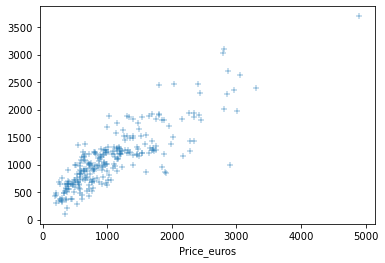

In [42]:
sns.scatterplot(y_test, y_predict, marker='+')

## 14. Conclusion
In this project, I have implemented one of the most popular supervised machine learning algorithm known as <b><i>Linear Regression</i></b>.<br><br>I find that the model has coefficient of determination which is also known as R^2 score to be around 0.7. Hence,  it is the good model to fit the data.